In [21]:
import matplotlib.pyplot as plt
import lifa.fames.process_mixing_ratio as em
import glob

### Lista de arquivos

In [22]:
# Gera lista de arquivos a serem processados. Arquivos precisam estar ordenados
files = sorted(glob.glob(r'.\sample_data\20241204_CEPEMA_FLARE_acima da chama_p=23\a???????.??????'))
files

['.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.552826',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.560971',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.565115',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.573260',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.581404',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.585549',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0505.593694',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.001838',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.005984',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.014128',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.022272',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da chama_p=23\\a24C0506.030417',
 '.\\sample_data\\20241204_CEPEMA_FLARE_acima da cha

### Configuração de processamento

In [23]:
# Configuração do processamento
config = {
    'cross_talk_355_353': 160,
    'ch4_cal': 4000,
    'co2_cal': 26000,
    'ce_cal': 0.25,
    'fluo_cal': 100,
    'z_ref_idx': 96,
    'z_flare_idx': 106,
    'dead_time': 1/240,
    'background_min_idx': 12000,
    'background_max_idx' : 15000,
    'z_min_flare': 100,
    'z_max_flare': 700,
    'n2_raman': {'channel':'00353.o_an', 'bin_shift':0, 'lambda': 323},
    'rayleigh': {'channel':'00355.o_an', 'bin_shift':0, 'lambda': 355},
    'co2_raman': {'channel':'00371.o_ph', 'bin_shift':4, 'lambda': 371},
    'ch4_raman_s': {'channel':'00395.s_ph', 'bin_shift':4, 'lambda': 395},
    'ch4_raman_p': {'channel':'00395.p_ph', 'bin_shift':4, 'lambda': 395},
    'fluorescence': {'channel':'00460.o_an', 'bin_shift':1, 'lambda': 460},
}

### Processamento

In [24]:
# Junta arquivos em grupos e processa. Saida é um Dataframe pandas
step = 1    # Passo para grupos de média
size = 8    # Numero de arquivos sequencias para media
output = em.emissions_group(files, config=config, step=step, size=size)
output

,start_time,stop_time,duration,bin_width,cross_talk_355_353,ch4_cal,co2_cal,ce_cal,fluo_cal,z_ref,...,ce_trace,fluo_mixing_trace,n2_raman_trace,rayleigh_trace,co2_raman_trace,ch4_raman_s_trace,ch4_raman_p_trace,fluorescence_trace,number_of_files,files
0,2024-12-05 05:54:47+00:00,2024-12-05 06:00:18+00:00,0 days 00:05:31,3.75,160,4000,26000,0.25,100,361.875,...,"[94.91608223108099, 97.78379206327044, 96.5531...","[0.2373081689912158, 0.1768679060359985, 0.138...","[6.632115971063617, 8.066036546587407, 9.44431...","[127.97476465890762, 150.34103567561058, 172.1...","[0.06833491596984993, 0.08055549629550389, 0.1...","[0.0030679557018950584, 0.0030679557018950584,...","[0.014621477774432077, 0.007293009743271209, 0...","[0.015614309281341221, 0.014149299683326788, 0...",8,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
1,2024-12-05 05:55:28+00:00,2024-12-05 06:00:59+00:00,0 days 00:05:31,3.75,160,4000,26000,0.25,100,361.875,...,"[94.64308776085922, 96.45671487186203, 96.0788...","[0.2563038957735384, 0.19377398772295856, 0.14...","[6.64474959154025, 8.081583125735273, 9.454477...","[128.03407826349786, 150.7439507537587, 172.72...","[0.06466776316710666, 0.08299854036064584, 0.1...","[0.0030797617230712985, 0.004301104691064066, ...","[0.014621884872181272, 0.012179012468963496, 0...","[0.01689630746081683, 0.015531651835584803, 0....",8,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
2,2024-12-05 05:56:10+00:00,2024-12-05 06:01:41+00:00,0 days 00:05:31,3.75,160,4000,26000,0.25,100,361.875,...,"[94.54643626454184, 96.29963394344452, 96.8628...","[0.23153278905265115, 0.18130213555334004, 0.1...","[6.581464545819533, 8.015621263582492, 9.38477...","[125.31933444091382, 147.87772927157167, 169.7...","[0.0634515103105934, 0.07933786040481829, 0.13...","[0.0030561496475723223, 0.00427749261556509, 0...","[0.014620663562360407, 0.012177791159142632, 0...","[0.015117954245719822, 0.01441337990478253, 0....",8,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
3,2024-12-05 05:56:51+00:00,2024-12-05 06:02:22+00:00,0 days 00:05:31,3.75,160,4000,26000,0.25,100,361.875,...,"[94.44510921778532, 96.3535408909798, 96.67547...","[0.19697095566387599, 0.17008486026982264, 0.1...","[6.568447935484882, 8.0016916953267, 9.3661530...","[123.02384186087725, 145.16509774621377, 166.5...","[0.06223079176876149, 0.08056119573028574, 0.1...","[0.003065920163429308, 0.003065920163429308, 0...","[0.014621477766145438, 0.012178605362927662, 0...","[0.012835799689840499, 0.013498117274365562, 0...",8,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
4,2024-12-05 05:57:33+00:00,2024-12-05 06:03:04+00:00,0 days 00:05:31,3.75,160,4000,26000,0.25,100,361.875,...,"[94.68734243357699, 95.45599501929638, 96.9974...","[0.17062763335888195, 0.16220508663939903, 0.1...","[6.49016354104196, 7.917302975810182, 9.277503...","[119.25675146019847, 141.33894945185918, 162.5...","[0.059787356489659015, 0.07689529809481153, 0....","[0.0030838327337098714, 0.0018625021960562015,...","[0.013400442454643703, 0.014621884872181272, 0...","[0.01098659169358207, 0.012737009108338526, 0....",8,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
5,2024-12-05 05:58:14+00:00,2024-12-05 06:03:45+00:00,0 days 00:05:31,3.75,160,4000,26000,0.25,100,361.875,...,"[96.20704842820629, 95.52443671734723, 96.7761...","[0.1713729821444473, 0.15994138524769788, 0.13...","[6.462720736267888, 7.890898773796749, 9.25011...","[115.90475037721104, 137.55865517731394, 158.5...","[0.06955976773071831, 0.07811413041128379, 0.1...","[0.0030797616733517132, 0.0030797616733517132,...","[0.010955152316025724, 0.014619442273256142, 0...","[0.010987925879618388, 0.012517368877984048, 0...",8,[.\sample_data\20241204_CEPEMA_FLARE_acima da ...
6,2024-12-05 05:58:55+00:00,2024-12-05 06:04:27+00:00,0 days 00:05:32,3.75,160,4000,26000,0.25,100,361.875,...,"[95.62054585772543, 95.83575844814199, 96.6527...","[0.17471449138469747, 0.16036260212567388, 0.1...","[6.383643237114463, 7.805685904888882, 9.16171...","[112.0

### Apresentação

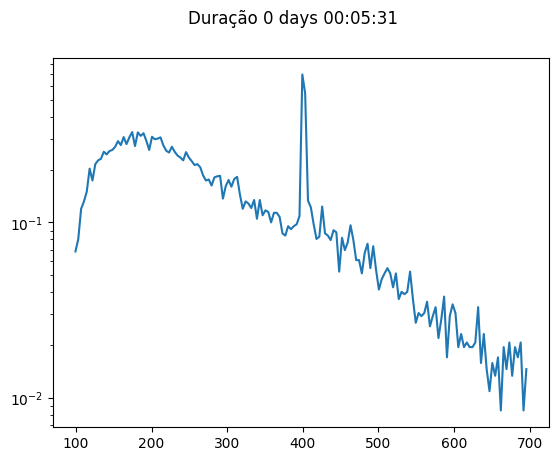

In [25]:
plt.suptitle('Duração {}'.format(output['duration'][0]))
plt.plot(output['z_trace'][0],output['co2_raman_trace'][0])
plt.yscale('log')


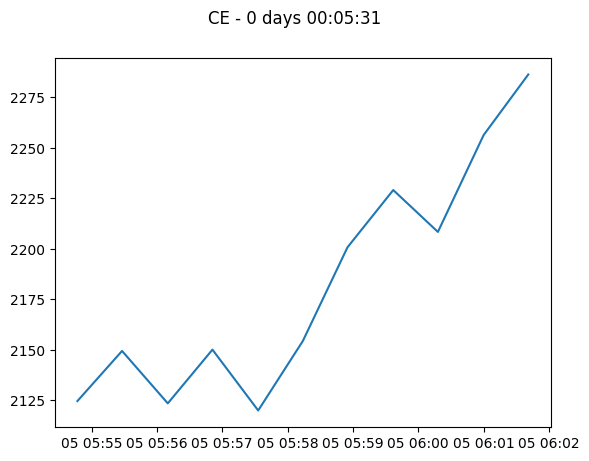

In [26]:
plt.suptitle('CE - {}'.format(output['duration'][0]))
plt.plot(output['start_time'],output['co2'])
